In [1]:
from leaf_area import *
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = np.load('LeafCounting/data/dataset_folder_5.npz', allow_pickle=True)

In [3]:
x = data['arr_0']
y = data['arr_1']

In [14]:
x.shape

(74, 240, 240, 3)

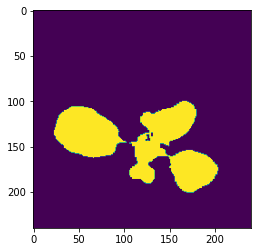

In [15]:
output, mask = extract_leaf(x[30])
plt.imshow(mask)

In [16]:
print(calculate_leaf_area("E:/Dataset/A5/rgb_00_009_05.png"))

0.13899305555555555


In [17]:
print(calculate_green_pixel(mask)/(240*240)*100)

13.854166666666668


In [19]:
dataset = np.load('LeafCounting/data/dataset.npz', allow_pickle=True)
(x_train, x_val, x_test, y_train, y_val, y_test) = dataset['data']

In [183]:
# boundaries for green color
boundaries = [
    ([33, 90, 40], [100, 255, 255])
]
(lower, upper) = boundaries[0]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

In [184]:
def remove_noises_mask_test(mask):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    mask = cv2.erode(mask, element, iterations=1)
    mask = cv2.dilate(mask, element, iterations=1)
    mask = cv2.erode(mask, element)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, element)
    return mask

def extract_leaf_test(np_image):
    hsvIm = cv2.cvtColor(np_image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsvIm, lower, upper)
    mask = remove_noises_mask_test(mask)
    output = cv2.bitwise_and(hsvIm, hsvIm, mask=mask)

    return output, mask

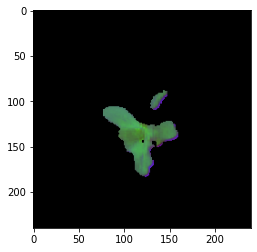

In [191]:
output, mask = extract_leaf_test(x[7])
plt.imshow(output)

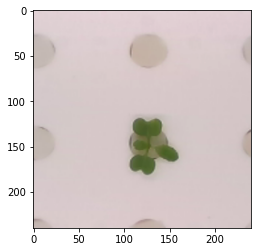

In [186]:
plt.imshow(x[20])

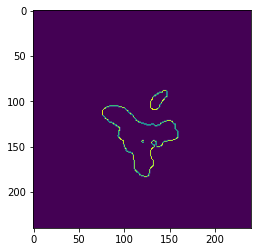

In [192]:
plt.imshow(cv2.Canny(mask, 100, 1200))